# Adidas Mock Data Exploration

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
a_mockData_df = pd.read_csv()

In [3]:
# Memory usage 

a_mockData_df.memory_usage(deep=True).sum()

7618627

#### Data Frame column fixes 
As seen below that some columns are set as object but should be int or floats. Also, I have noticed that the numbers have space, comma and dollar signs. These also needed to removed to change the data types. I am also dropping retailer id cause Retailer is enough to determine data value. Columns that will be modified:
- Price per Unit obj to int64
- Units Sold obj to int64
- Total Sales obj to int64
- Operating Profit obj to int64
- Operating Margin obj to float64

##### Change Column dTypes 

In [4]:
# Change to int64
change_dtype_int = a_mockData_df[['Units Sold','Total Sales','Operating Profit']]

# Remove space and change Data Type, for loop to reduce repetitive tasks 
for changes in change_dtype_int:
    a_mockData_df[changes] = a_mockData_df[changes].str.replace(' ', '').str.replace(',', '').str.replace('$', '', regex=True).str.strip()
    a_mockData_df[changes] = a_mockData_df[changes].astype('int64')


In [5]:
# Change to float

# Remove space 
a_mockData_df['Price per Unit'] = a_mockData_df['Price per Unit'].str.replace(' ', '').str.replace('$', '', regex=True).str.strip()

# Change Data type
a_mockData_df['Price per Unit'] = a_mockData_df['Price per Unit'].astype('float32')

In [6]:
# Change to int 8, the precision for int 8 bits are -127 to 127

# Remove space 
a_mockData_df['Operating Margin'] = a_mockData_df['Operating Margin'].str.replace(' ', '').str.replace('%', '', regex=True).str.strip()

# Change Data type
a_mockData_df['Operating Margin'] = a_mockData_df['Operating Margin'].astype('int8')

In [7]:
# Reduced Memory usage 
# Can reduce more when checking stats

a_mockData_df.memory_usage(deep=True).sum()

4879769

In [8]:
# Shape of the data frame and first five rows
print(a_mockData_df.shape)
a_mockData_df.head()

(9648, 13)


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000,300000,50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000,150000,30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000,140000,35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500,133875,35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000,162000,30,In-store


In [9]:
# Tale 

a_mockData_df.tail()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200,896,28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305,1378,32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544,2791,37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940,1235,42,Outlet
9647,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Women's Street Footwear,29.0,83,2407,650,27,Outlet


Both head and Tail showing Retailers as Foot Locker. I need to inspect data for unique values. If its only Foot Locker then it will be one

In [10]:
# Number of unique retailers in the data set

print("Total",len(a_mockData_df['Retailer'].unique()), "Number of unique retailers")
a_mockData_df['Retailer'].unique()


Total 6 Number of unique retailers


array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

This also means that the Retailer IDs are also the same 

In [11]:
print("Total",len(a_mockData_df['Retailer ID'].unique()), "Number of unique retailers")

Total 4 Number of unique retailers


This is not the case, we might need to drop the IDs and just work with retailers. Also we do not really need ID.

In [12]:
# Drop Retailer ID 
a_mockData_df = a_mockData_df.drop('Retailer ID',axis=1)

In [13]:
# Check for Nan values
(
    a_mockData_df
    .isna()
    .sum()
)

Retailer            0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

Great! No NaN Values

In [14]:
# Data Frame info on data types

a_mockData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Invoice Date      9648 non-null   object 
 2   Region            9648 non-null   object 
 3   State             9648 non-null   object 
 4   City              9648 non-null   object 
 5   Product           9648 non-null   object 
 6   Price per Unit    9648 non-null   float32
 7   Units Sold        9648 non-null   int64  
 8   Total Sales       9648 non-null   int64  
 9   Operating Profit  9648 non-null   int64  
 10  Operating Margin  9648 non-null   int8   
 11  Sales Method      9648 non-null   object 
dtypes: float32(1), int64(3), int8(1), object(7)
memory usage: 801.0+ KB


Need to change numerical values 

In [15]:
a_mockData_df.describe()

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,45.216625,256.930037,93273.437500,34425.282131,42.299129
std,14.705407,214.252030,141916.016727,54193.124141,9.719742
min,7.000000,0.000000,0.000000,0.000000,10.000000
25%,35.000000,106.000000,4254.500000,1922.000000,35.000000
50%,45.000000,176.000000,9576.000000,4371.500000,41.000000
75%,55.000000,350.000000,150000.000000,52063.000000,49.000000
max,110.000000,1275.000000,825000.000000,390000.000000,80.000000


### Data Analysis
 

Text(0.5, 1.0, 'Total Sales Revenue by Retailer')

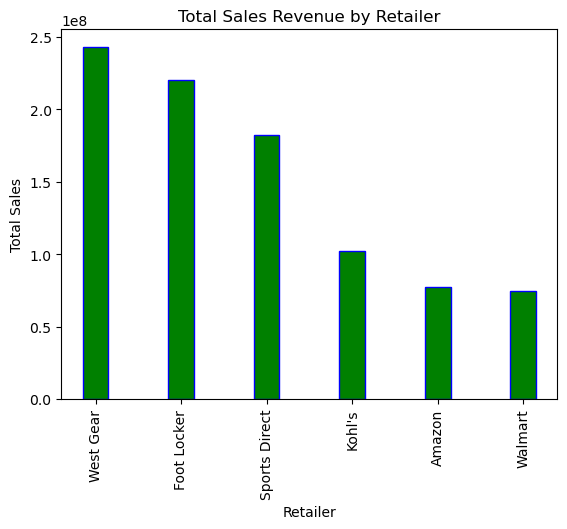

In [34]:
# Retailer Performance 
(
    a_mockData_df
    .groupby('Retailer')
    ['Total Sales']
    .sum()
    .sort_values(ascending=False)
    .plot(kind= 'bar',width = 0.3, color ='green', edgecolor='blue')
 
)



# Adding labels and title
plt.xlabel('Retailer')
plt.ylabel('Total Sales')
plt.title('Total Sales Revenue by Retailer')



#### Correlation Heat manp 

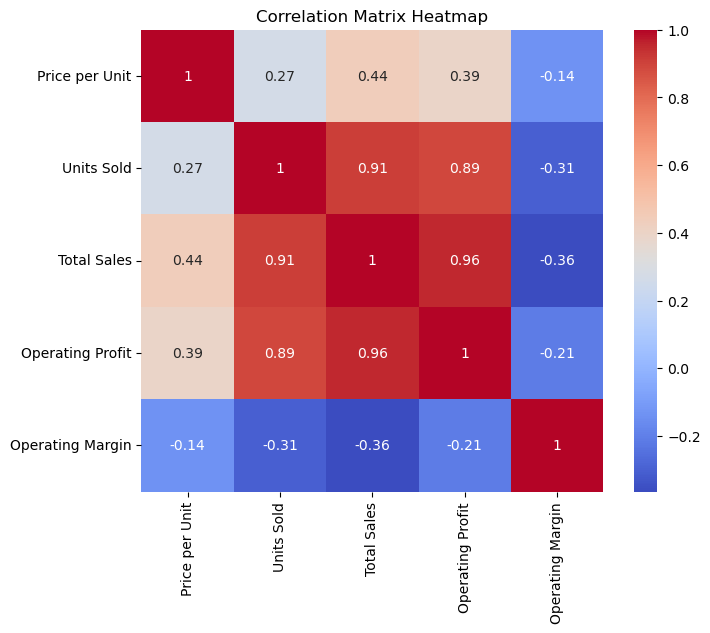

In [17]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(a_mockData_df.corr(numeric_only=True), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()